# THE BATTLE OF NEIGHBORHOODS -Capstone Project (Hyderabad)

## Topic: Finding the Best Neighborhoods to open a Gymnasium in Hyderabad

### Date : 20 July,2020

### Project by: Aryan Desai

### 

## 1. Introduction
###  Background :

   ##### We are in the year 2020, almost a new decade! And there is no denying that an increasing number of people are turning health conscious every year. 
   ##### Everyone dreams of having the perfect beach body- a ripped look or a muscular physique, and a lot of them are ready to put in work too! 
   
   ##### Exposure from social media and other digital platforms have opened new roads to information for people and a whole lot of them are sticking to healthy diets and striving to burn calories. Spending time at a gym and pumping iron has become something of a trend these days. So, everybody's looking for a gym! Healthcare clubs (or Gyms as people like to call it) have become a huge business. Look around, I bet you'll find a few in your own locality. 
   
   
   ##### Although this is a good thing for the public, it is a business hitch for the gym owners.
           
           
###  Problem Description:
              
   ##### Now, we understand that competition is the wellspring of improvement but too much competition will only result in a loss for all parties. And the problem here is that too many Gyms in vicinity to each other causes loss in business and no scope for new gyms to open. 
   
   ##### So, this project focuses on finding the best possible locality for one to open a Gymnasium. This is done by comparing the neighborhoods and the number of gyms available in them. 
   ##### I have chosen Hyderabad as my city of application because I’m personally familiar with it. But do note that this project can be applied to any city. By the end of this project we will find the localities that are most favorable for running a Gymnasium in Hyderabad.

## 2. Data Acquisition :
   ##### For this project I have used the following data: List of Suburbs of Hyderabad, Foursquare data on the required locations.
   ##### Acquiring this data was simple and done through web scraping. The list of Suburbs of Hyderabad was obtained from the Wikipedia page. And Foursquare data from the Foursquare API.
   #### Link to the Wikipedia page:  
   https://commons.wikimedia.org/wiki/Category:Suburbs_of_Hyderabad,_India


## 3.Methodology
   ##### 1.Getting the co-ordinates of the target city.
   ##### 2.Getting the list of neighborhoods and their co-ordinates.
   ##### 3.Exploring the most visited venues in the target localities.
   ##### 4.Clustering the localities.
   ##### 5.Analyzing the clusters formed.

## 4.Code:

### Installing all the required libraries and importing them beforehand :

In [1]:
!conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.



In [2]:
! conda install folium -c conda-forge --yes

Solving environment: done

# All requested packages already installed.



In [3]:
! conda install geocoder -c conda-forge --yes

Solving environment: done

# All requested packages already installed.



In [4]:
import pip
if int(pip.__version__.split('.')[0])>9:
        from pip._internal import main
else:
        from pip import main
def install(package):
       main(['install', package])

install('BeautifulSoup4')

In [5]:
import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim
import geocoder
import requests
from bs4 import BeautifulSoup
    
from sklearn.cluster import KMeans

### Acquiring Data through Web Scraping and preprocessing it

In [6]:
#getting the location of hyderabad 
geolocator = Nominatim(user_agent='Hyderabad_explorer')
g = geolocator.geocode("Hyderabad, India")
print(g.address)
hyd_lat = g.latitude
hyd_lng = g.longitude
print("The Latitude and Longitude of Hyderabad is {} and {}".format(hyd_lat, hyd_lng))

Hyderabad, Charminar Circle, Ward 49 Ghansi Bazar, Greater Hyderabad Municipal Corporation South Zone, Hyderabad, Bahadurpura mandal, Hyderabad, Telangana, 500012, India
The Latitude and Longitude of Hyderabad is 17.3616079 and 78.4746286


In [7]:
#Scraping website for list of localities
neig = requests.get("https://commons.wikimedia.org/wiki/Category:Suburbs_of_Hyderabad,_India").text

In [8]:
soup = BeautifulSoup(neig, 'html.parser')
#Creating a list to store neighborhood data
neighborhoodlist = []
for i in soup.find_all('div', class_='mw-category')[0].find_all('a'):
    neighborhoodlist.append(i.text)

#Creating a dataframe from the list
neig_df = pd.DataFrame({"Locality": neighborhoodlist})
neig_df.head()

,Locality
0,Abids
1,Alwal
2,"Ameerpet, Hyderabad"
3,"Bandlaguda, Rangareddy"
4,Banjara Hills


In [9]:
neig_df.info()
neig_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Locality  54 non-null     object
dtypes: object(1)
memory usage: 560.0+ bytes


(54, 1)

### Data Preparation 

In [10]:
#creating a function to get the cordinates of all the localities
def get_location(localities):
    g = geocoder.arcgis('{}, Hyderabad, India'.format(localities))
    get_latlng = g.latlng
    return get_latlng

In [11]:
co_ordinates = []
for i in neig_df["Locality"].tolist():
    co_ordinates.append(get_location(i))
print(co_ordinates)

Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Abids%2C+Hyderabad%2C+India&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Alwal%2C+Hyderabad%2C+India&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Ameerpet%2C+Hyderabad%2C+Hyderabad%2C+India&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Bandlaguda%2C+Rangareddy%2C+Hyderabad%2C+India&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Banjara+Hills%2C+Hyderabad%2C+India&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Basheerbagh%2C+Hyderabad%2C+India&maxLocations=1
Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=Begumpet%2C+Hyderabad%2C+Ind

In [12]:
#creating a datframe of all the locations
co_ordinates_df = pd.DataFrame(co_ordinates, columns=['Latitudes', 'Longitudes'])

In [13]:
#updating neigh_df dataframe
neig_df["Latitudes"] = co_ordinates_df["Latitudes"]
neig_df["Longitudes"] = co_ordinates_df["Longitudes"]
neig_df.head()

,Locality,Latitudes,Longitudes
0,Abids,17.38980,78.47658
1,Alwal,17.53543,78.54427
2,"Ameerpet, Hyderabad",17.43535,78.44861
3,"Bandlaguda, Rangareddy",17.29982,78.46495
4,Banjara Hills,17.41535,78.43435


### Generating maps

In [14]:
#plotting localities on map
import folium
hyd_map = folium.Map(location=[hyd_lat, hyd_lng],zoom_start=11)

#adding markers to the map for localities
#marker for Hyderabad
folium.Marker([hyd_lat, hyd_lng], popup='<i>Hyderabad</i>', color='red', tooltip="Click to see").add_to(hyd_map)

#markers for localities
for latitude,longitude,name in zip(neig_df["Latitudes"], neig_df["Longitudes"], neig_df["Locality"]):
    folium.CircleMarker(
        [latitude, longitude],
        radius=6,
        color='blue',
        popup=name,
        fill=True,
        fill_color='#3186ff'
    ).add_to(hyd_map)

hyd_map

### Using FourSquare API to explore localities

In [15]:
CLIENT_ID = 'ABWAGUVX2FZ5JAAGIU5YNKQ2N4D1B0RNXF5Y1M4SBMGB0LR0'
CLIENT_SECRET = 'FYYPFTE4X1VEPAY3JQIWUFJ2WH4KXTZWK4IBDTANQH5FMY02'
VERSION = '20180605'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ABWAGUVX2FZ5JAAGIU5YNKQ2N4D1B0RNXF5Y1M4SBMGB0LR0
CLIENT_SECRET:FYYPFTE4X1VEPAY3JQIWUFJ2WH4KXTZWK4IBDTANQH5FMY02


In [16]:
#Getting the top 100 venues in each locality
radius = 2000
LIMIT = 100

venues = []

for lat, lng, locality in zip(neig_df["Latitudes"], neig_df["Longitudes"], neig_df["Locality"]):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
    results = requests.get(url).json()['response']['groups'][0]['items']

    for venue in results:
        venues.append((locality, lat, lng, venue['venue']['name'], venue['venue']['location']['lat'], venue['venue']['location']['lng'], venue['venue']['categories'][0]['name']))

In [17]:
venues[0]

('Abids',
 17.389800000000037,
 78.47658000000007,
 'Pragati',
 17.38808781386729,
 78.48113363131787,
 'South Indian Restaurant')

In [18]:
#Convert the venue list into dataframe
venues_df = pd.DataFrame(venues)
venues_df.columns = ['Locality', 'Latitude', 'Longitude', 'Venue name', 'Venue Lat', 'Venue Lng', 'Venue Category']
venues_df.head()

,Locality,Latitude,Longitude,Venue name,Venue Lat,Venue Lng,Venue Category
0,Abids,17.3898,78.47658,Pragati,17.388088,78.481134,South Indian Restaurant
1,Abids,17.3898,78.47658,Santosh Dhaba,17.388485,78.479509,Indian Restaurant
2,Abids,17.3898,78.47658,Mayur Pan Shop,17.388894,78.480578,Juice Bar
3,Abids,17.3898,78.47658,Karachi Bakery,17.383454,78.475075,Bakery
4,Abids,17.3898,78.47658,Grand Hotel,17.387760,78.477577,Indian Restaurant


In [19]:
#Number of venues for each Locality
venues_df.groupby(['Locality']).count()

,Latitude,Longitude,Venue name,Venue Lat,Venue Lng,Venue Category
Locality,,,,,,
Abids,84,84,84,84,84,84
Alwal,4,4,4,4,4,4
"Ameerpet, Hyderabad",100,100,100,100,100,100
"Bandlaguda, Rangareddy",4,4,4,4,4,4
Banjara Hills,100,100,100,100,100,100
Basheerbagh,100,100,100,100,100,100
Begumpet,51,51,51,51,51,51
Boduppal,5,5,5,5,5,5
Bolarum,4,4,4,4,4,4


In [20]:
#Getting the total categories
print('There are {} total number of categries.'.format(len(venues_df['Venue Category'])))

There are 2325 total number of categries.


In [21]:
#List of categories
print('Total number of unique catefories are {}'.format(len(venues_df['Venue Category'].unique().tolist())))
#First 10 categories
venues_df['Venue Category'].unique().tolist()#[:10]

Total number of unique catefories are 151


['South Indian Restaurant',
 'Indian Restaurant',
 'Juice Bar',
 'Bakery',
 'Hotel',
 'Food Truck',
 'Ice Cream Shop',
 'Shoe Store',
 'Chaat Place',
 'Diner',
 'Neighborhood',
 'Lounge',
 'Burger Joint',
 'Café',
 'Dessert Shop',
 'Stadium',
 'Snack Place',
 'Science Museum',
 'Department Store',
 'Chinese Restaurant',
 'Restaurant',
 'Fast Food Restaurant',
 'Smoke Shop',
 'Coffee Shop',
 'Breakfast Spot',
 'Hotel Bar',
 'Mobile Phone Shop',
 'Bar',
 'Shopping Mall',
 'Food',
 'Multiplex',
 'Performing Arts Venue',
 'Gaming Cafe',
 'Indie Movie Theater',
 'Farmers Market',
 'Pizza Place',
 'Fried Chicken Joint',
 'Hookah Bar',
 'Clothing Store',
 'Sandwich Place',
 'Food Court',
 'Jewelry Store',
 'Bus Station',
 'Cosmetics Shop',
 'Electronics Store',
 'Miscellaneous Shop',
 'Golf Course',
 'Asian Restaurant',
 'Pharmacy',
 'ATM',
 'Pub',
 'Bookstore',
 'American Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Nightclub',
 'Hyderabadi Restaurant',
 'Motorcycle Shop',
 'Donut Shop',

### Analyzing the Localities on basis of the venues

In [22]:
hyd_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

hyd_onehot['Locality'] = venues_df['Locality']
#move the locality column to the front
hyd_onehot = hyd_onehot[ [ 'Locality' ] + [ col for col in hyd_onehot.columns if col!='Locality' ] ]
hyd_onehot.head()

,Locality,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Arcade,...,Steakhouse,Supermarket,Taxi Stand,Tea Room,Temple,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Wings Joint,Women's Store
0,Abids,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abids,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abids,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abids,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abids,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
hyd_grouped = hyd_onehot.groupby(['Locality']).mean().reset_index()
print(hyd_grouped.shape)
hyd_grouped.head()

(52, 152)


,Locality,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Arcade,...,Steakhouse,Supermarket,Taxi Stand,Tea Room,Temple,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Wings Joint,Women's Store
0,Abids,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0
1,Alwal,0.25,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0
2,"Ameerpet, Hyderabad",0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,...,0.00,0.0,0.0,0.0,0.00,0.01,0.0,0.05,0.0,0.0
3,"Bandlaguda, Rangareddy",0.00,0.0,0.25,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0
4,Banjara Hills,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,...,0.01,0.0,0.0,0.0,0.01,0.00,0.0,0.01,0.0,0.0


In [24]:
#numbers of localities having Gyms
len(hyd_grouped[hyd_grouped["Gym"] > 0])

13

In [25]:
hyd_gym = hyd_grouped[['Locality', 'Gym']]
hyd_gym.head()

,Locality,Gym
0,Abids,0.00
1,Alwal,0.00
2,"Ameerpet, Hyderabad",0.01
3,"Bandlaguda, Rangareddy",0.00
4,Banjara Hills,0.00


### Clustering the Localitites

In [26]:
#K-means clustering
cluster = 3 

#Dataframe for clustering
hyd_clustering = hyd_gym.drop(['Locality'], 1)

#run K-means clustering
k_means = KMeans(init="k-means++", n_clusters=cluster, n_init=12).fit(hyd_clustering)

#getting the labels for first 10 locality 
print(k_means.labels_[0:10])

[0 0 2 0 0 0 2 0 0 0]


In [27]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(hyd_clustering)
    distortions.append(kmeanModel.inertia_)

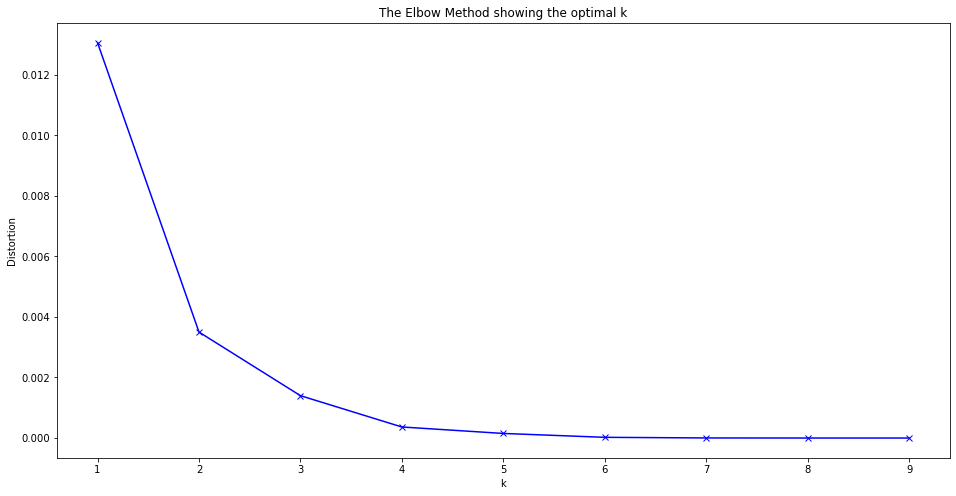

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
#Creating a of hyd_gym dataframe
hyd_labels = hyd_gym.copy()

#addring label to hyd_labels
hyd_labels["Cluster Label"] = k_means.labels_
hyd_labels.head()

,Locality,Gym,Cluster Label
0,Abids,0.00,0
1,Alwal,0.00,0
2,"Ameerpet, Hyderabad",0.01,2
3,"Bandlaguda, Rangareddy",0.00,0
4,Banjara Hills,0.00,0


In [30]:
#Merging the hyd_labels and neig_df dataframes to get the latitude and longitudes for each locality
hyd_labels = hyd_labels.join(neig_df.set_index('Locality'), on='Locality')
hyd_labels.head()

,Locality,Gym,Cluster Label,Latitudes,Longitudes
0,Abids,0.00,0,17.38980,78.47658
1,Alwal,0.00,0,17.53543,78.54427
2,"Ameerpet, Hyderabad",0.01,2,17.43535,78.44861
3,"Bandlaguda, Rangareddy",0.00,0,17.29982,78.46495
4,Banjara Hills,0.00,0,17.41535,78.43435


In [31]:
#Grouping the localities according to their Cluster Labels
hyd_labels.sort_values(["Cluster Label"], inplace=True)
hyd_labels.head()

,Locality,Gym,Cluster Label,Latitudes,Longitudes
0,Abids,0.0,0,17.38980,78.47658
27,Kukatpally,0.0,0,17.48735,78.42087
28,L. B. Nagar,0.0,0,17.51265,78.44129
30,Malakpet,0.0,0,17.37493,78.51567
31,Malkajgiri,0.0,0,17.44737,78.53520


### Demonstrating clusters on maps

In [32]:
#Plot the cluster on map
cluster_map = folium.Map(location=[hyd_lat, hyd_lng],zoom_start=11)

#marker for Hyderabad
folium.Marker([hyd_lat, hyd_lng], popup='<i>Hyderabad</i>', color='red', tooltip="Click to see").add_to(cluster_map)

#Getting the colors for the clusters
col = ['red', 'orange', 'blue']

#markers for localities
for latitude,longitude,name,clus in zip(hyd_labels["Latitudes"], hyd_labels["Longitudes"], hyd_labels["Locality"],hyd_labels["Cluster Label"]):
    label = folium.Popup(name + ' - Cluster ' + str(clus))
    folium.CircleMarker(
        [latitude, longitude],
        radius=6,
        color=col[clus],
        popup=label,
        fill=False,
        fill_color=col[clus],
        fill_opacity=0.3
    ).add_to(cluster_map)
       
cluster_map

### Cluster Analysis

In [33]:
#First Cluster
cluster_1 = hyd_labels[hyd_labels['Cluster Label'] == 0]
print("There are {} localities in cluster-1".format(cluster_1.shape[0]))
mean_presence_1 = cluster_1['Gym'].mean()
print("The mean occurence of Gym in cluster-1 is {0:.3f}".format(mean_presence_1))
cluster_1

There are 39 localities in cluster-1
The mean occurence of Gym in cluster-1 is 0.000


,Locality,Gym,Cluster Label,Latitudes,Longitudes
0,Abids,0.0,0,17.389800,78.476580
27,Kukatpally,0.0,0,17.487350,78.420870
28,L. B. Nagar,0.0,0,17.512650,78.441290
30,Malakpet,0.0,0,17.374930,78.515670
31,Malkajgiri,0.0,0,17.447370,78.535200
32,Manikonda,0.0,0,17.401390,78.391630
33,Masab Tank,0.0,0,17.400930,78.453620
34,Mehdipatnam,0.0,0,17.392630,78.442190
35,Miyapur,0.0,0,17.421020,78.582440
36,Moazzam Jahi Market,0.0,0,17.384480,78.474420


In [34]:
#Second Cluster
cluster_2 = hyd_labels[hyd_labels['Cluster Label'] == 1]
print("There are {} localities in cluster-2".format(cluster_2.shape[0]))
mean_presence_2 = cluster_2['Gym'].mean()
print("The mean occurence of gym in cluster-2 is {0:.3f}".format(mean_presence_2))
cluster_2

There are 2 localities in cluster-2
The mean occurence of gym in cluster-2 is 0.074


,Locality,Gym,Cluster Label,Latitudes,Longitudes
14,Erragadda,0.052632,1,17.45333,78.43034
48,Sitaphalmandi,0.095238,1,17.42800,78.51700


In [35]:
#Third Cluster
cluster_3 = hyd_labels[hyd_labels['Cluster Label'] == 2]
print("There are {} localities in cluster-3".format(cluster_3.shape[0]))
mean_presence_3 = cluster_3['Gym'].mean()
print("The mean occurence of Gym in cluster-3 is {0:.3f}".format(mean_presence_3))
cluster_3

There are 11 localities in cluster-3
The mean occurence of Gym in cluster-3 is 0.016


,Locality,Gym,Cluster Label,Latitudes,Longitudes
46,Sanjeeva Reddy Nagar,0.014085,2,17.44438,78.44724
2,"Ameerpet, Hyderabad",0.010000,2,17.43535,78.44861
23,Jubilee Hills,0.020000,2,17.42865,78.39762
41,Narayanguda,0.011765,2,17.39642,78.48842
15,Gachibowli,0.010000,2,17.43181,78.38636
29,Madhapur,0.010000,2,17.45694,78.39013
19,HITEC City,0.010000,2,17.44823,78.37429
26,"Koti, Hyderabad",0.014286,2,17.38594,78.48338
24,Kachiguda,0.019608,2,17.38688,78.49553
6,Begumpet,0.019608,2,17.44729,78.45396


## 5.Results:

##### The results from the above algorithm show that the mean occurences of gym in the 3 clusters are 0.016, 0.074, 0.00 respectively.
##### The most no of gyms are found in cluster 2 and the least in cluster 3. 
##### Cluster 3 has the most no of localities,but still doesnt have an abundance of gyms.

## 6.Conclusion :
      

##### From the above results it is clear that the least no of gyms are seen in cluster 3 i.e., 0.00. Which means there is very less competition in those areas of the city. 
##### Therefore, it is the Neighborhoods in Cluster 3 that are recommended if one is willing to open a Gym.
#### The goal of the project has been achieved.